Notebook for the one-hot autoencoder

In [1]:
from communications import *
from model import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

100%|██████████| 11/11 [08:11<00:00, 44.67s/it]


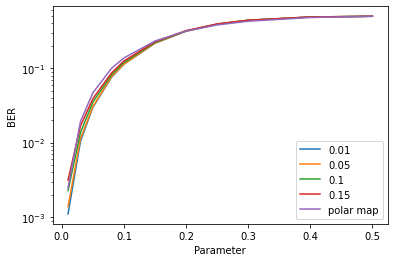

In [3]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('BSCOHEncoder_001_test.h5',custom_objects={'BSC_OH2':BSC_OH2}),load_model('BSCOHDecoder_001_test.h5',custom_objects={'BSC_OH2':BSC_OH2},compile=False)
encoder2,decoder2=load_model('BSCOHEncoder_005_test.h5',custom_objects={'BSC_OH2':BSC_OH2}),load_model('BSCOHDecoder_005_test.h5',custom_objects={'BSC_OH2':BSC_OH2},compile=False)
encoder3,decoder3=load_model('BSCOHEncoder_01_test.h5',custom_objects={'BSC_OH2':BSC_OH2}),load_model('BSCOHDecoder_01_test.h5',custom_objects={'BSC_OH2':BSC_OH2},compile=False)
encoder4,decoder4=load_model('BSCOHEncoder_015_test.h5',custom_objects={'BSC_OH2':BSC_OH2}),load_model('BSCOHDecoder_015_test.h5',custom_objects={'BSC_OH2':BSC_OH2},compile=False)


#encoder_list,decoder_list=[encoder1],[decoder1]
encoder_list,decoder_list=[encoder1,encoder2,encoder3,encoder4],[decoder1,decoder2,decoder3,decoder4]
multBER(encoder_list,decoder_list,'BSC',[0.01,0.03,0.05,0.08,0.1,0.15,0.2,0.25,0.3,0.4,0.5],do_polar_MAP=True,enc_MAP_ind=[],
        save_params=False,params_name=['AWGNparams.npy'],
        save_ber=False,ber_name=['AWGNber_05.npy','AWGNber_1.npy','AWGNber_2.npy','AWGNber_polarmap.npy','AWGNber_05_map.npy','AWGNber_1_map.npy','AWGNber_2_map.npy'],
        plot_ber=True,points_per_value=[200000],plot_legend=['0.01','0.05','0.1','0.15','polar map'],
        save_fig=False,fig_name='AWGNAEvsPolar.pdf')